In [1]:
import numpy as np

In [51]:
# base class for declaring distance function
class Distance:
    def getDistance(self, pt1, pt2):
        pass;
    
# base class for declaring select prototypes samples from training samples
class PrototypeSelector:
    @staticmethod
    def getPrototypes(self, training_set, label_set, M = 0):
        pass;

In [74]:
class Euclidean(Distance):
    def getDistance(self, pt1, pt2):
        assert type(pt1) is type(pt2)
        return np.sqrt(np.sum((np.subtract(pt1, pt2))**2));

In [93]:
'''
Condense NN algorithm
Paper: https://sci2s.ugr.es/sites/default/files/files/TematicWebSites/pr/T-4-2010-PSMethods.pdf
'''

class LabelBasedSelector(PrototypeSelector):
    @staticmethod
    def getPrototypes(training_list = [], label_list = [], M = 0):
        import numpy as np
        import random as rd
        import collections as cl
        assert M < len(label_list);
        assert isinstance(training_list, list) or isinstance(training_list, np.ndarray);
        assert len(training_list) == len(label_list);
        
        # wrap list with numpy
        if not isinstance(training_list, np.ndarray):
            train_np = np.array(training_list);
        
        if not isinstance(label_list, np.ndarray):
            label_np = np.array(label_list);
        
        # pair data and label
        aggregate = dict()
        label_total = len(label_np);
        
        for i in xrange(len(label_np)):
            if label_np[i] not in aggregate:
                aggregate[label_np[i]] = list();
            aggregate[label_np[i]].append(train_np[i]);
            
        
        # randome select subset
        res = list();
        for label, data_list in aggregate.iteritems():
            m = int((len(data_list) / float(label_total)) * M);
            d_list = rd.sample(data_list, m);
            for data in d_list:
                res.append((data, label));
        
        data_list = np.array([res[i][0] for i in xrange(len(res))]);
        label_list = np.array([res[i][1] for i in xrange(len(res))]);
        return data_list, label_list

In [84]:
class RandomSelector(PrototypeSelector):
    @staticmethod
    def getPrototypes(training_list = [], label_list = [], M = 0):
        import numpy as np
        import random as rd
        assert M < len(label_list);
        assert isinstance(training_list, list) or isinstance(training_list, np.ndarray);
        assert len(training_list) == len(label_list);
        
        # wrap list with numpy
        if not isinstance(training_list, np.ndarray):
            train_np = np.array(training_list);
        
        if not isinstance(label_list, np.ndarray):
            label_np = np.array(label_list);
        
        # create a dictionary based on label
        aggregate = list();
        for i in xrange(len(train_np)):
            aggregate.append([train_np[i], label_np[i]]);
        
        # randome select subset
        selected = rd.sample(aggregate, M);
        
        data_selected = np.array([selected[i][0] for i in xrange(len(selected))]);
        label_selected = np.array([selected[i][1] for i in xrange(len(selected))]);
        
        return data_selected, label_selected

In [24]:
class LearningModel:
    def loadTrainingData(self, data, labels):
        pass;
    def train():
        pass;
    def validateModel(self, test_data, test_labels):
        pass;

In [117]:
import numpy as np;
class NearestNeighbor(LearningModel):
    
    def __init__(self, data, label, DistanceFunc):
        if data is not None:
            self.data = np.array(data);
            
        if label is not None:
            self.label = np.array(label);
            
        assert isinstance(DistanceFunc, Distance)
        self.distFunc = DistanceFunc.getDistance;
        
        self.test_error = 0;
        self.num_test = 0;
        self.test_error_rate = 0;
    def loadTrainingData(self, data, labels):
        self.data = data;
        self.labels = labels;
        
    def validateModel(self, test_data, test_labels):
        assert isinstance(test_data, list) or isinstance(test_data, np.ndarray);
        assert isinstance(test_labels, list) or isinstance(test_labels, np.ndarray);
        
        if not isinstance(test_data, np.ndarray):
            wrap_data = np.array(test_data);
        if not isinstance(test_data, np.ndarray):
            wrap_labels = np.array(test_labels);
            
        self.num_test = len(wrap_data);
        
        for i in xrange(len(wrap_data)):
            nn = self.getNN(wrap_data[i]);
            if nn != test_labels[i]:
                self.test_error += 1;
        
        self.test_error_rate = float(self.test_error) / self.num_test;
        
    def getNN(self, pt):
        assert hasattr(self, 'data');
        assert len(self.data) > 0;
        
        wrap_pt = np.array(pt);
        list_pt = np.array([pt for i in xrange(len(self.data))]);
        res = map(self.distFunc, self.data, list_pt)
        idx = res.index(min(res))
        return self.label[idx];

In [7]:
def download(url, des="default.txt"):
    import urllib2 as ul
    response = ul.urlopen(url)
    data = response.read();
    with open(des, 'w') as f:
        f.write(data)
        
def unzipGz(path, des="default.txt"):
    import gzip
    import shutil
    with gzip.open(path, 'rb') as f_in:
        with open(des, 'wb') as f_out:
            shutil.copyfileobj(f_in, f_out)

In [8]:
# method for getting imgs data from MNIST
'''
[offset] [type]          [value]          [description] 
0000     32 bit integer  0x00000803(2051) magic number 
0004     32 bit integer  60000            number of images 
0008     32 bit integer  28               number of rows 
0012     32 bit integer  28               number of columns 
0016     unsigned byte   ??               pixel 
0017     unsigned byte   ??               pixel 
'''

img_size = 28 * 28;
fmt = ">"
for i in xrange(img_size):
    fmt += "B";
    
def getImgs(path):
    import struct
    imgs = list();
    with open(path, 'rb') as f:
        byte = f.read(16); # "skip headers"
        byte = f.read(img_size);
        while byte != "":
            img = struct.unpack_from(fmt, byte)
            imgs.append(img);
            byte = f.read(img_size);
    return imgs;

In [9]:
# method for getting label data from MNIST
'''
[offset] [type]          [value]          [description] 
0000     32 bit integer  0x00000801(2049) magic number (MSB first) 
0004     32 bit integer  60000            number of items 
0008     unsigned byte   ??               label 
0009     unsigned byte   ??               label 
'''

def getLabels(path):
    import struct
    labels = list();
    with open(path, 'rb') as f:
        byte = f.read(8); "skip headers"
        byte = f.read(1);
        while byte != "":
            labels.append(struct.unpack('>B',byte)[0]);
            byte = f.read(1);
    return labels;

In [43]:
'''
 Note: only execute the following: functions once, as they are only download and unzip data
'''
# unzip file 
train_imgs_file = "train_data"
des = train_imgs_file + ".gz";
# download("http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz",des)
# unzipGz(des, train_imgs_file)

# get label file
train_label_file = "train_label"
label_des = train_label_file +".gz"
# download("http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz",label_des)
# unzipGz(label_des, train_label_file)

In [10]:
# Prepare training data nad labels
labels = getLabels(train_label_file);

imgs = getImgs(train_imgs_file);

In [77]:
# get test data file and label file
test_imgs_file = "test_data"
test_imgs_des = test_imgs_file + '.gz';
# download("http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz",test_imgs_des)
# unzipGz(test_imgs_des, test_imgs_file)

test_label_file = "test_label"
test_label_des = test_label_file + '.gz';
# download("http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz",test_label_des)
# unzipGz(test_label_des, test_label_file)

In [78]:
# Prepare test data and labels
test_labels = getLabels(test_label_file);
test_imgs = getImgs(test_imgs_file);

In [124]:
'''
    Create 1NN model based on two selector
'''
distance = Euclidean();
M = [100,500,1000,5000,10000];
rand_error_rates = list();
my_error_rates = list();

for m in M:
    (rand_imgs, rand_labels) = RandomSelector.getPrototypes(imgs, labels, m);
    rand_nn = NearestNeighbor(rand_imgs, rand_labels, distance);

    (my_imgs, my_labels) = LabelBasedSelector.getPrototypes(imgs, labels, m);
    my_nn = NearestNeighbor(my_imgs, my_labels, distance);
    
    rand_nn.validateModel(test_imgs, test_labels);
    my_nn.validateModel(test_imgs, test_labels);
    
    print 'Finish test on M = ' + str(m) + ':' 
    print rand_nn.test_error_rate
    print my_nn.test_error_rate
    
    rand_error_rates.append(rand_nn.test_error_rate);
    my_error_rates.append(my_nn.test_error_rate);


Finish test on M = 100:
0.2726
0.2985
Finish test on M = 500:
0.1518
0.1583
Finish test on M = 1000:
0.1061
0.1185


KeyboardInterrupt: 

In [ ]:
print rand_error_rates
print my_error_rates

## The following is used for visual debugging:

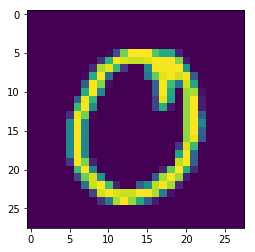

In [106]:
import matplotlib.pyplot as plt
arr = np.asarray(my_imgs[0]).reshape((28,28));
plt.imshow(arr)
plt.show();

In [80]:
test_labels[0]

7

5
